Generating and Testing the Fried Infinate Phase Screens
=======================================================

In [1]:
import numpy
import matplotlib.pylab as plt
from tqdm import tqdm, trange, tqdm_notebook
from astropy.io import fits

import aotools
from aotools.turbulence import infinitephasescreen_fried

In [18]:
# Set up parameters for creating phase screens
n_zerns = 60
nx_size = 128
D = 4.2
pxl_scale = D/nx_size
r0 = 0.164
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
n_tests = 10 # 16
n_scrns = 1000
noll = fits.getdata("../noll.fits").diagonal() * (D/r0)**(5./3)
stencil_length_factor = 32

Zs = aotools.zernikeArray(n_zerns, nx_size)

Example Phase Screen
--------------------

New size: 129
(128, 128)


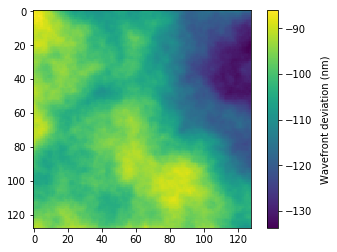

In [19]:
phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
print(phase_screen.scrn.shape)
plt.figure()
plt.imshow(phase_screen.scrn)
cbar = plt.colorbar()
cbar.set_label('Wavefront deviation (nm)', labelpad=8)

Zernike Breakdown of Phase Screen
---------------------------------

In [5]:
stencil_length_factor = 16


time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

z_coeffs_inf_f = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tqdm(range(n_tests)):
    phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
    for i in range(n_scrns):
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf_f[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
        
z_vars_inf_f = z_coeffs_inf_f.var(1)

  0%|          | 0/10 [00:00<?, ?it/s]

New size: 129


 10%|█         | 1/10 [00:04<00:42,  4.72s/it]

New size: 129


 20%|██        | 2/10 [00:08<00:35,  4.47s/it]

New size: 129


 30%|███       | 3/10 [00:13<00:31,  4.45s/it]

New size: 129


 40%|████      | 4/10 [00:17<00:27,  4.51s/it]

New size: 129


 50%|█████     | 5/10 [00:22<00:23,  4.63s/it]

New size: 129


 60%|██████    | 6/10 [00:26<00:18,  4.53s/it]

New size: 129


 70%|███████   | 7/10 [00:31<00:13,  4.64s/it]

New size: 129


 80%|████████  | 8/10 [00:36<00:09,  4.71s/it]

New size: 129


 90%|█████████ | 9/10 [00:42<00:05,  5.09s/it]

New size: 129


100%|██████████| 10/10 [00:48<00:00,  5.33s/it]


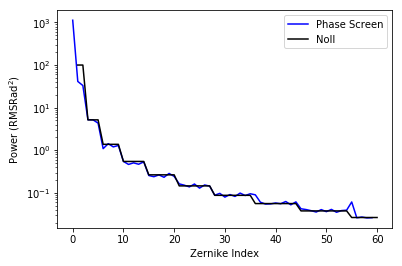

In [6]:
f, a = plt.subplots()
a.plot(z_vars_inf_f.mean(0), color="b", label="Phase Screen")
a.plot(range(1, n_zerns+1), noll[:n_zerns] , label="Noll", color="k")
a.set_yscale('log')
a.set_xlabel("Zernike Index")
a.set_ylabel("Power ($\mathrm{RMS Rad}^2$)")
plt.legend()

r<sub>0</sub> Scaling
---------------------

In [25]:
r0s = [0.05, 0.1, 0.15, 0.2]
screens = 1
size = 256
region = 128
D = 4.2
pxl_scale = float(D/region)

for i, r0 in enumerate(r0s):
    for j in range(screens):
        phase_screen = infinitephasescreen_fried.PhaseScreen(size, pxl_scale, r0, 100., stencil_length_factor=stencil_length_factor)
        
        region_screen = phase_screen.scrn[100:100+region, 100:100+region]
        variance = region_screen.var()
        print(r0, variance)

New size: 257
0.05 1777.4508150325055
New size: 257
0.1 185.18383647118543
New size: 257
0.15 47.21205580791986
New size: 257
0.2 165.79173489121004
